### Primer aproximación para la descomposicion en valores singulares de espectros Raman

Primeramente se propone una lectura de espectros Raman, estos serán objectos de la clase RamanSpectra

In [58]:
# Objetivo : Empaquetar los espectros Raman en un Array para su decomposición en valores singulares
# 
# El cálculo debe realizarse con la matriz M y la transpuesta MT

import matplotlib.pyplot as plt
import numpy as np
import os

# Definimos la Clase base "RamanSpectra" que debera contener información relacionada con la medicion
# TODO: Podemos añadir un mapeo de intensidades para caracterizar la superficie de medicion
# TODO: Añadir otros parametros de informacion para la muestra o espectro

class RamanSpectra(object):

    def __init__(self,data,info):
        self.data = data
        self.info = info
        self.x = self.data[0]
        self.y = self.data[1]
        return;



### La clase RamanSpectraGroup colecta todos los espectros Raman en una carpeta definida

In [59]:

class RamanSpectraGroup(object):

    def __init__(self):
        # Un Grupo de espectros Raman será una lista de Objectos RamanSpectra
        # con los atributos de info y data, inicialmente el atributo spectra es una lista vacía

        # TODO: Es posible añadir una opcion que distinga cuando un espectro ya ha sido añadido al grupo de
        # espectros Raman
        
        self.ramanSpectra = []
        return;

    def getFromFolder(self, folder):
        # NOTE: Este método no verifica si los archivos en el folder seleccionado ya se encuentran en self.spectra
        # el método construye una lista de archivos en el directorio seleccionado y llama al método
        # getDetailedSpectra con una lista que pasa a su argumento (self.files)
        self.folder = '/' + folder
        self.path   = os.getcwd()
        # TODO: Verificar si es posible discriminar con - if file in files - para evitar la duplicacion de archivos
        self.files  = [ self.path + self.folder + '/' + f for f in os.listdir(self.path + self.folder)]
        self.getDetailedSpectra(self.files)
        return;

    def getDetailedSpectra(self, targets):
        for file in targets:
            with open(file, 'r', encoding = 'unicode_escape') as tempfile:
                content = tempfile.read()
                info    = content.split('#Acquired')[1].split('\n')[0].replace("=\t",'')
                values  = content.split('#Acquired')[1].split('\n')[1:-1]
                spx=[]
                spy=[]
                for string_values in values:
                    try:
                        x = float(string_values.split('\t')[0])
                        y = float(string_values.split('\t')[1])
                    except:
                        print('Ocurrio un error al hacer la lectura de los archivos')
                    spx.append(x)
                    spy.append(y)
                self.ramanSpectra.append(RamanSpectra((spx,spy), info ))
        return;
    
    def returnMatrix(self, intt, xy = 1):
        ls = []
        for raman in self.ramanSpectra:
            ls.append(raman.data[xy])
        return ls;

In [60]:
rgroup = RamanSpectraGroup()
rgroup.getFromFolder('datosramana')
rgroup.getFromFolder('datosramanb')
rgroup.getFromFolder('datosramanc')

In [61]:
ls = []
for spectra in rgroup.ramanSpectra:
    ls.append(spectra.y)

ls = np.column_stack(ls)



In [62]:
ls

array([[  42.,   52.,   36., ...,   40.,   46.,   40.],
       [  44.,   54.,   46., ...,   46.,   48.,   46.],
       [  46.,   48.,   54., ...,   52.,   56.,   52.],
       ...,
       [2710., 2318., 2606., ..., 1378., 2706., 1378.],
       [2708., 2338., 2562., ..., 1394., 2680., 1394.],
       [2646., 2336., 2628., ..., 1394., 2738., 1394.]])

/home/jupyter/.local/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


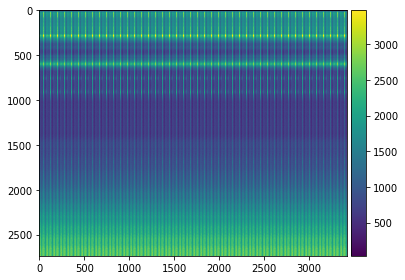

In [63]:
from skimage import io
import numpy as np
io.imshow(ls)

In [64]:
U, S, VT = np.linalg.svd(ls,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()